### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

### Importing the csv file

In [3]:
df=pd.read_csv(r"C:\Users\laksh\Downloads\train.csv\train.csv")

### Checking for the first five and last five rows

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.tail()

,id,qid1,qid2,question1,question2,is_duplicate
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


### Getting an overview of the dataset using info() method

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


### Finding the shape of the dataset

In [7]:
df.shape

(404290, 6)

### Finding the missing values

In [8]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

We can see that there is 1 missing value in 'question1' column and 2 missing values in 'question2' column. As the dataset we have is large, we will drop the null values. 

In [9]:
# Removing the null values
df.dropna(inplace=True)
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [10]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

### Checking for the duplicates

In [11]:
df.duplicated().sum()

0

There are no duplicate rows in the dataset.

### Resetting the index

In [12]:
df = df.reset_index(drop=True)

In [13]:
df.shape

(404287, 6)

### Plotting the number of duplicate and non-duplicate questions (Target - is_duplicate) 

is_duplicate
0    255024
1    149263
Name: count, dtype: int64
is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

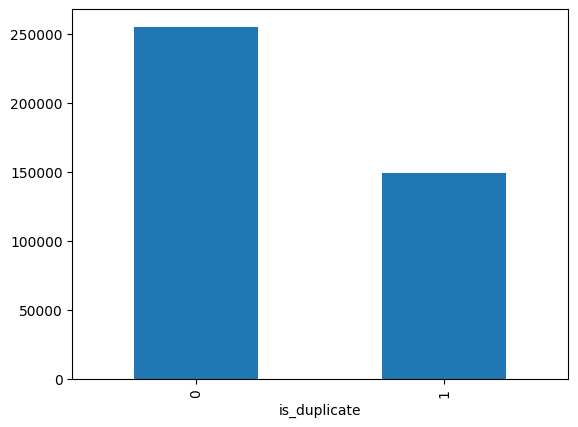

In [14]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

There are more number of non-duplicate questions than the duplicate questions in the dataset.

### Checking for unique and repeated questions

In [15]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print('Number of unique questions:',unique_qs)
print('Number of unique questions that appear more than one time:',qs_morethan_onetime)
print("Maximum number of times a question is being repeated:",max(qids.value_counts()))

Number of unique questions: 537929
Number of unique questions that appear more than one time: 111778
Maximum number of times a question is being repeated: 157


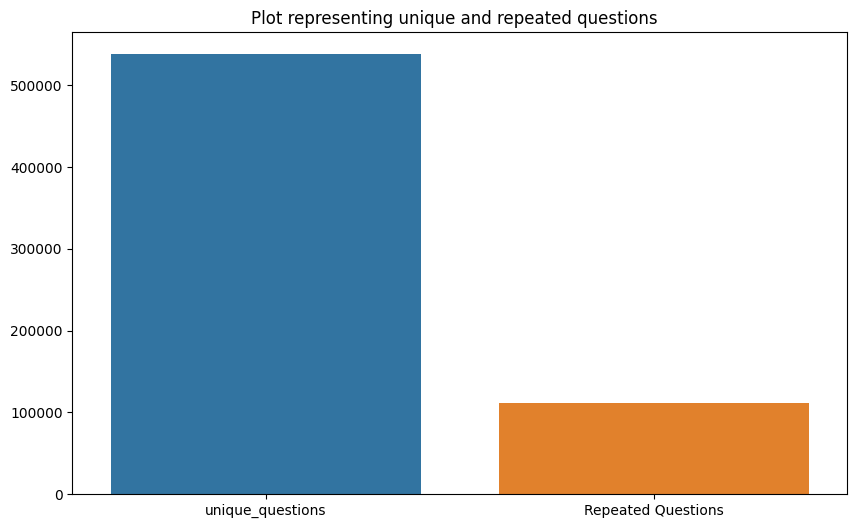

In [16]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x=x,y = y)
plt.show()

### Number of occurences of each question

Maximum number of times a single question is repeated: 157



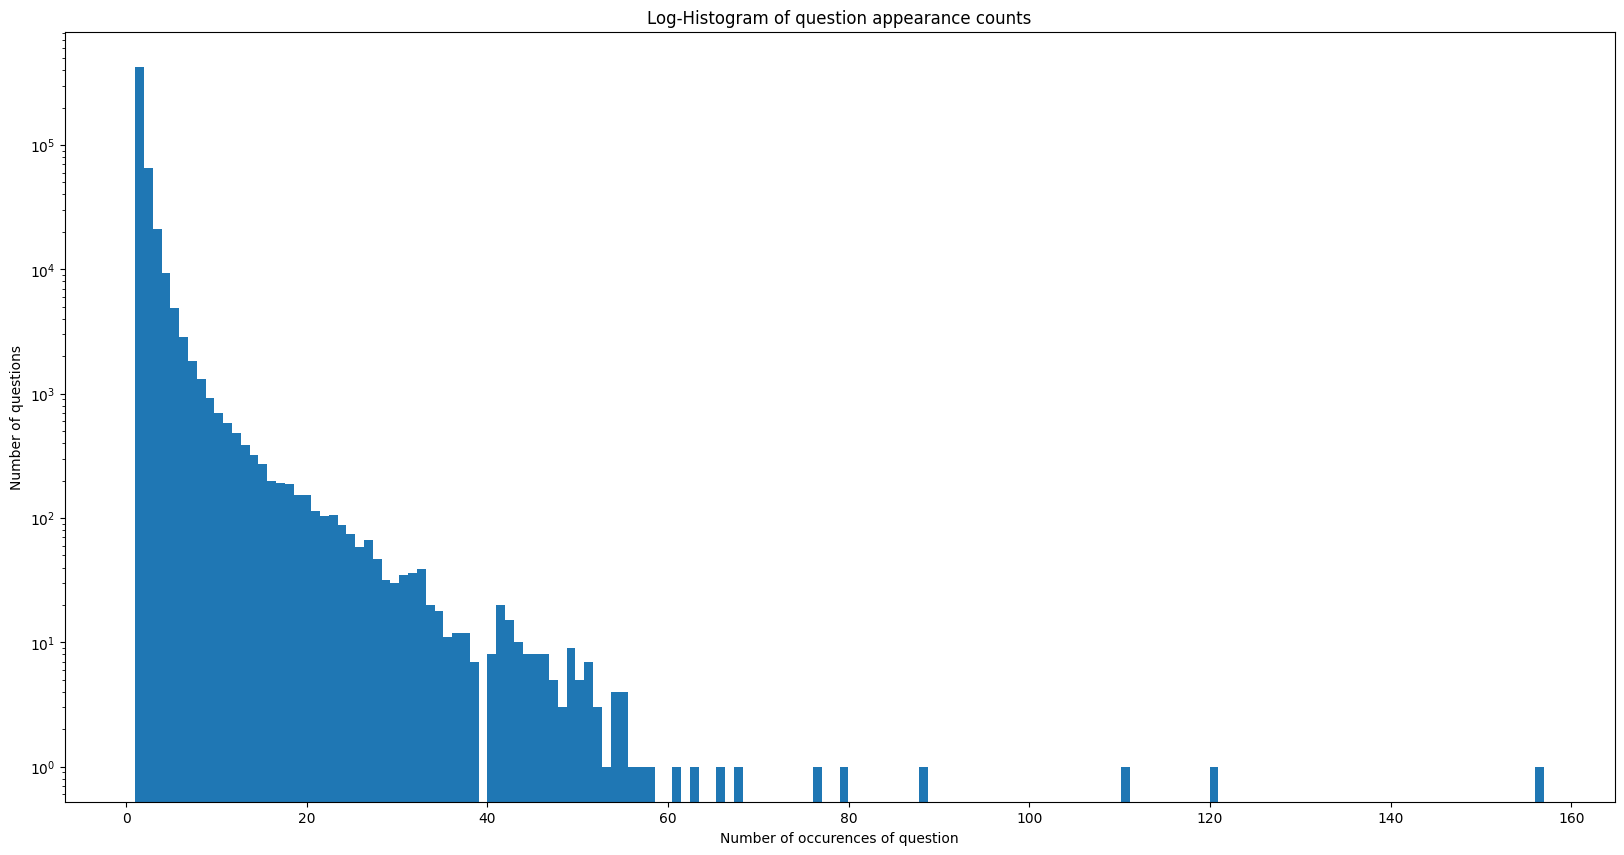

In [17]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

In [18]:
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') ## Frequency of qid1 - how many times the qid1 is repeated
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count') ## Frequency of qid2 - how many times the qid2 is repeated
df['q1len'] = df['question1'].str.len() ## Length of question 1
df['q2len'] = df['question2'].str.len() ## Length of question 2
df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" "))) ## words in question 1
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" "))) ## words in question 2

In [19]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words'],
      dtype='object')

In [20]:
## Normalized number of Common words from question 1 and question 2 
def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
df['word_Common'] = df.apply(normalized_word_Common, axis=1)

In [21]:
## Normalized number of total words from question 1 and question 2
def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
df['word_Total'] = df.apply(normalized_word_Total, axis=1)

In [22]:
## Normalized word share - ratio of common words given by total words
def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
df['word_share'] = df.apply(normalized_word_share, axis=1)

In [23]:
df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2'] ## sum total of frequency of qid1 and qid2
df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2']) ## absolute difference of frequency of qid1 and qid2

In [24]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


### Univariate Analysis of extracted features

In [25]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 66
Number of Questions with minimum length [question2] : 22


##### feature: word_share

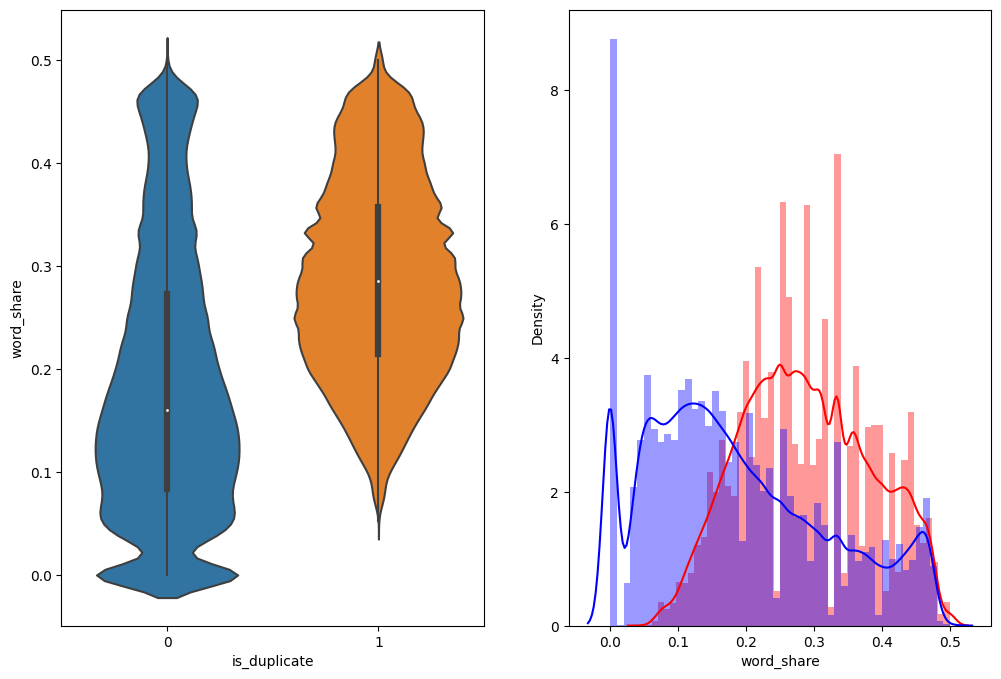

In [26]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

##### feature: word_common

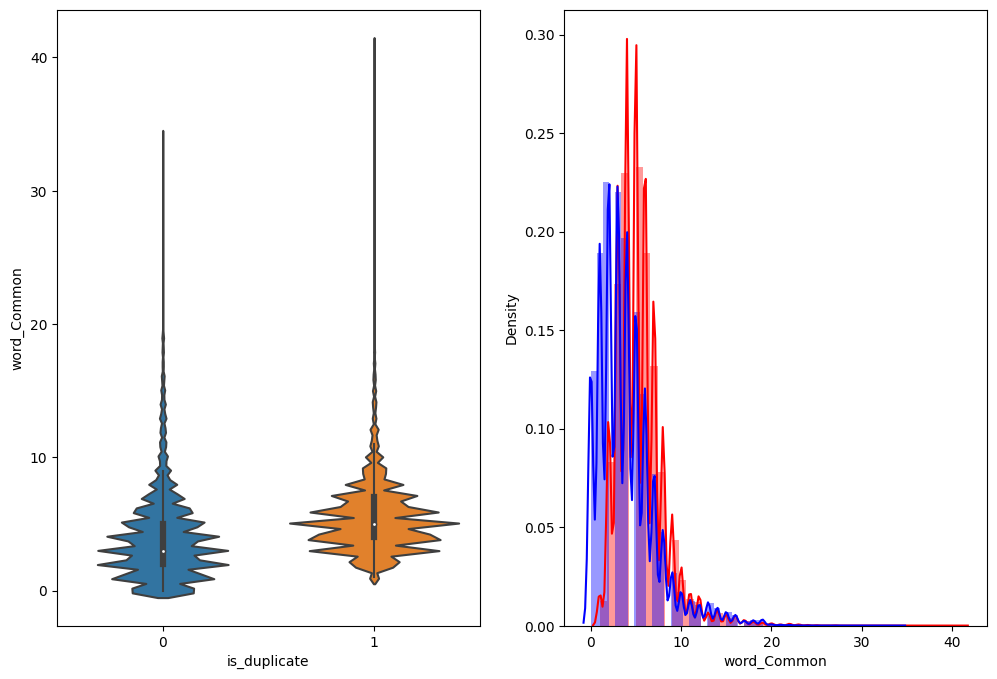

In [27]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

### Text preprocessing and Feature Engineering

In [28]:
# To get the results in 4 decimal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x

In [29]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

In [30]:
# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

In [31]:
def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features)) # minimum common word count
    df["cwc_max"]       = list(map(lambda x: x[1], token_features)) # maximum common word count
    df["csc_min"]       = list(map(lambda x: x[2], token_features)) # minimum common stop count
    df["csc_max"]       = list(map(lambda x: x[3], token_features)) # maximum common stop count
    df["ctc_min"]       = list(map(lambda x: x[4], token_features)) # minimum common token count
    df["ctc_max"]       = list(map(lambda x: x[5], token_features)) # maximum common token count
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features)) # last word equal or not
    df["first_word_eq"] = list(map(lambda x: x[7], token_features)) # first word equal or not
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features)) # length difference in question 1 and question 2
    df["mean_len"]      = list(map(lambda x: x[9], token_features)) # average token length of both the questions
   
    #Computing Fuzzy Features and Merging with Dataset
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [32]:
df = extract_features(df)
df.to_csv("nlp_features_train.csv", index=False)

token features...
fuzzy features..


In [33]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51,88,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,...,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50,65,...,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,3,1,76,39,...,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


### Analysis of extracted features

In [35]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510048


In [39]:
#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s',encoding = "utf-8")
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s',encoding = "utf-8")

In [36]:
print ("Total number of words in duplicate pair questions :",len(p))
print ("Total number of words in non duplicate pair questions :",len(n))

Total number of words in duplicate pair questions : 298526
Total number of words in non duplicate pair questions : 510048


In [41]:
from os import path

In [43]:
# reading the text files:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt'),encoding="utf8").read()
textn_w = open(path.join(d, 'train_n.txt'),encoding="utf8").read()

print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16109886
Total number of words in non duplicate pair questions : 33192876


### Wordcloud for duplicate question pairs

Word Cloud for Duplicate Question pairs


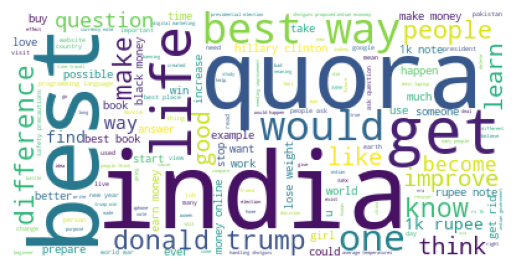

In [45]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=STOP_WORDS)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc)
plt.axis("off")
plt.show()

### Wordcloud for non-duplicate question pairs

Word Cloud for Duplicate Question pairs


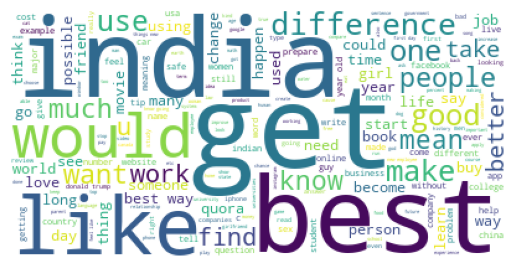

In [46]:
wc = WordCloud(background_color="white", max_words=len(textn_w), stopwords=STOP_WORDS)
wc.generate(textn_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc)
plt.axis("off")
plt.show()

### Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio']

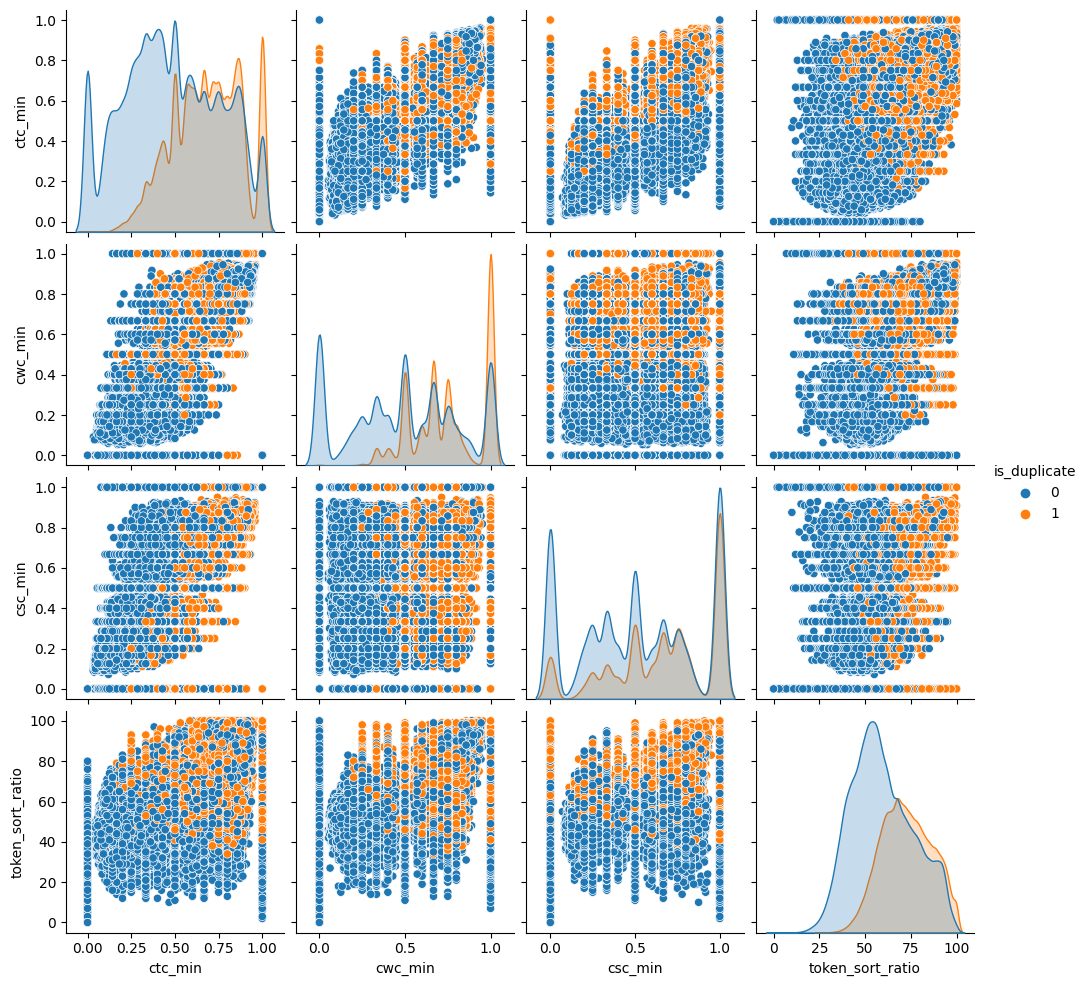

In [47]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

All the non-duplicate questions' count ratios are starting from 0, where as for duplicates they are starting from ~ 40. 

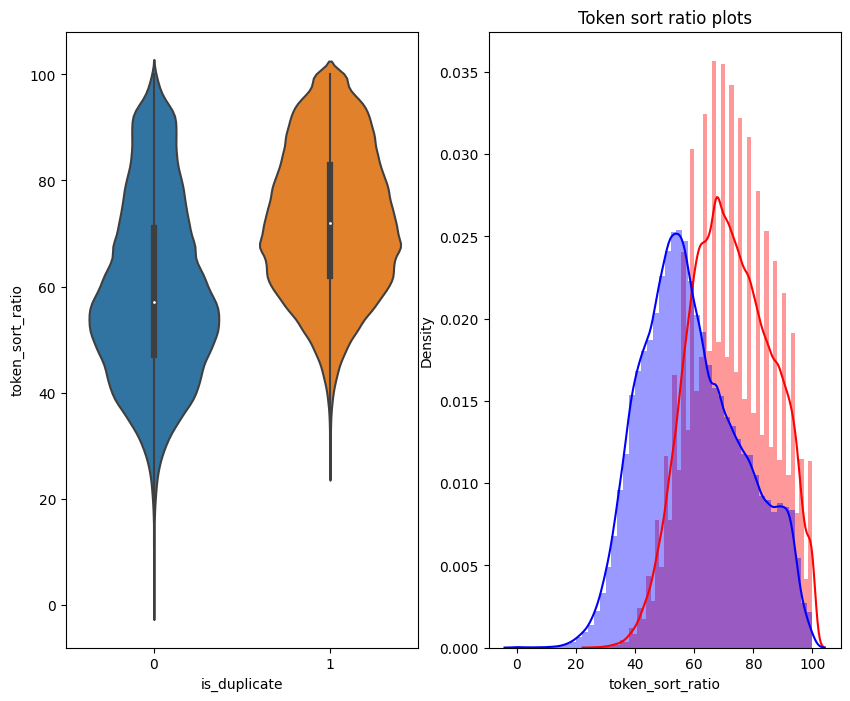

In [52]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.title("Token sort ratio plots")
plt.show()

For token sort ratio, we can see the distribution's peak for non-dupicates is around 50, and for duplicates is around 70. 

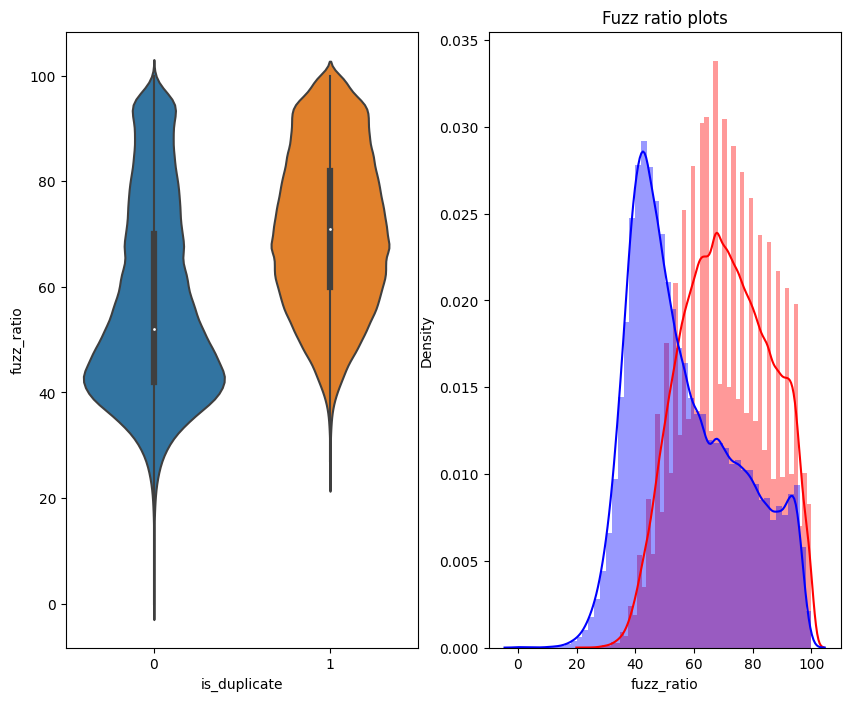

In [53]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.title("Fuzz ratio plots")
plt.show()

The fuzz_ratio distribution for non-duplicates is maximum as near to 40 and that of duplicates is near to 70.


In [78]:
new_df = df.sample(40000,random_state = 42)

In [79]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
8067,how do i play pokémon go in korea,how do i play pokémon go in china
224277,will a breathing treatment help a cough,how can i help someone that is unconscious but...
252450,is kellyanne conway annoying in your opinion,did kellyanne conway really imply that we shou...
174038,how do you rate 1 10 and review maruti baleno,what career options does one have after comple...
384860,what are some good books on marketing,what are some of the best books ever written a...


In [80]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(40000, 27)


,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
8067,0,2,2,34,34,8,8,7.0,16.0,0.437500,...,0.874989,0.0,1.0,0.0,8.0,90,81,88,88,0.800000
224277,0,1,1,40,63,7,11,1.0,17.0,0.058824,...,0.181817,0.0,0.0,4.0,9.0,55,48,36,43,0.268293
252450,0,2,1,45,118,7,21,2.0,27.0,0.074074,...,0.090909,0.0,0.0,15.0,14.5,53,44,42,58,0.391304
174038,0,1,1,48,127,9,20,0.0,27.0,0.000000,...,0.000000,0.0,0.0,11.0,15.5,33,32,33,46,0.061224
384860,1,1,2,38,61,7,11,5.0,18.0,0.277778,...,0.454541,1.0,1.0,4.0,9.0,88,66,68,63,0.358974


### Count Vectorizer

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

bong_vec = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(bong_vec.fit_transform(questions).toarray(),2)

In [82]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(40000, 6000)

In [83]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(40000, 6027)


,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,2,2,34,34,8,8,7.0,16.0,0.437500,...,0,0,0,0,0,0,0,0,0,0
224277,0,1,1,40,63,7,11,1.0,17.0,0.058824,...,0,0,0,0,0,0,0,0,0,0
252450,0,2,1,45,118,7,21,2.0,27.0,0.074074,...,0,0,0,0,0,0,0,0,0,0
174038,0,1,1,48,127,9,20,0.0,27.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
384860,1,1,2,38,61,7,11,5.0,18.0,0.277778,...,0,0,0,0,0,0,0,0,0,0


In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

### Classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

In [92]:
ytrainpred_rf = rf.predict(X_train)
ytestpred_rf = rf.predict(X_test)
rf_f1_train = f1_score(y_train,ytrainpred_rf)
rf_f1_test = f1_score(y_test,ytestpred_rf)
print("F1 score for train in Random Forest Classifier:",rf_f1_train)
print("F1 score for test in Random Forest Classifier:",rf_f1_test)

F1 score for train in Random Forest Classifier: 1.0
F1 score for test in Random Forest Classifier: 0.7661952156451893


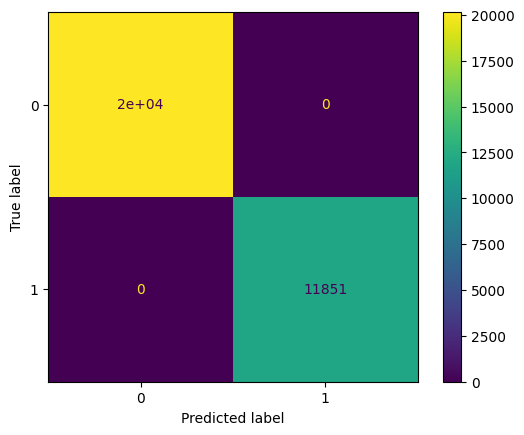

In [93]:
yTrainCM_rf = confusion_matrix(y_train, ytrainpred_rf, labels = rf.classes_)
cmtrain = ConfusionMatrixDisplay(yTrainCM_rf, display_labels=rf.classes_)
cmtrain.plot()

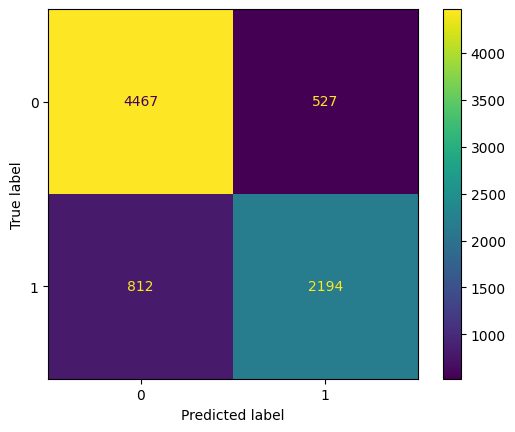

In [94]:
yTestCM_rf = confusion_matrix(y_test, ytestpred_rf, labels = rf.classes_)
cmtest = ConfusionMatrixDisplay(yTestCM_rf, display_labels=rf.classes_)
cmtest.plot()

In [89]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
ytrainpred = xgb.predict(X_train)
ytestpred = xgb.predict(X_test)
xgb_f1_train = f1_score(y_train,ytrainpred)
xgb_f1_test = f1_score(y_test,ytestpred)
print("F1 score for train in XG Boost Classifier:",xgb_f1_train)
print("F1 score for test in XG Boost Classifier:",xgb_f1_test)

F1 score for train in XG Boost Classifier: 0.850062170389744
F1 score for test in XG Boost Classifier: 0.7692833931930904


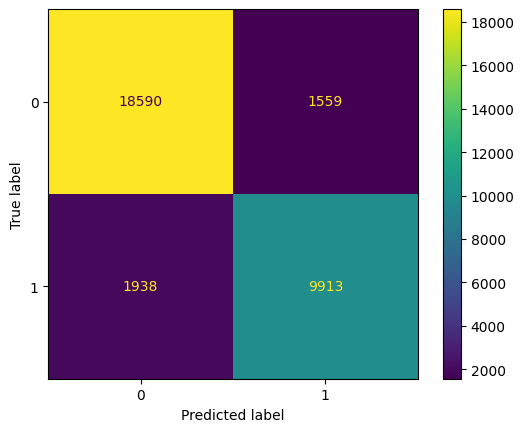

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
yTrainCM = confusion_matrix(y_train, ytrainpred, labels = xgb.classes_)
cmtrain = ConfusionMatrixDisplay(yTrainCM, display_labels=xgb.classes_)
cmtrain.plot()

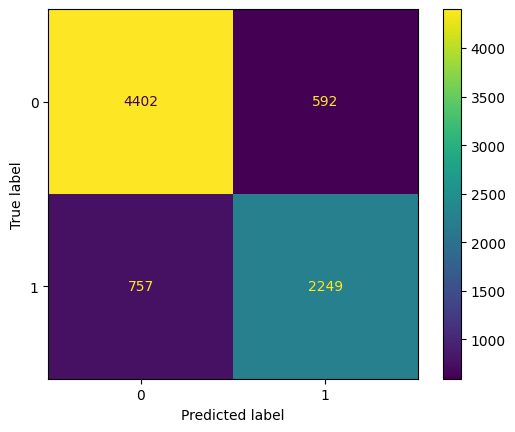

In [91]:
yTestCM = confusion_matrix(y_test, ytestpred, labels = xgb.classes_)
cmtest = ConfusionMatrixDisplay(yTestCM, display_labels=xgb.classes_)
cmtest.plot()

### When comapring Random Forest and XGBoost Classifiers, Random forest seems to be overfitting and XG Boost's performance is similar for both train and test.
